<a href="https://colab.research.google.com/github/gayu999Code/Project/blob/master/Industry_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/m0rp43us/openmeteopy

  Cloning https://github.com/m0rp43us/openmeteopy to /tmp/pip-req-build-o6kyz1pd
  Running command git clone --filter=blob:none --quiet https://github.com/m0rp43us/openmeteopy /tmp/pip-req-build-o6kyz1pd
  Resolved https://github.com/m0rp43us/openmeteopy to commit be76f2deabd7ff5ec3f87ebc983091a367e24117
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.0/739.0 kB 23.6 MB/s eta 0:00:00
  Created wheel for openmeteopy: filename=openmeteopy-0.1.0-py3-none-any.whl size=64551 sha256=2f365eb1d8751872062da2fa477209fcd06ec9544351f894a558738352b8b4d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ifr78f_/wheels/53/e4/b5/687b5a6197913f4c83e0c3201bd5d39ce74fff69be9956cfa3
Successfully built openmeteopy


In [2]:

from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder


drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
file_path = "/content/drive/MyDrive/Industry_Project/records.csv"  # Update path if using Google Drive
df = pd.read_csv(file_path)

In [ ]:
!pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
import cudf

In [ ]:
!nvidia-smi

Mon Mar  3 05:56:04 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install rapids-ai==23.10.* --extra-index-url=https://pypi.nvidia.com

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
ERROR: Could not find a version that satisfies the requirement rapids-ai==23.10.* (from versions: none)
ERROR: No matching distribution found for rapids-ai==23.10.*


In [ ]:
import cudf
print(cudf.__version__)

24.12.00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install seaborn matplotlib

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Data
# Convert timestamp to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract time-based features
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour

# Drop the original timestamp column
df.drop(columns=['timestamp'], inplace=True)

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill for missing data

# Encoding categorical variables (district & sub-division)
label_encoder_district = LabelEncoder()
df['district_encoded'] = label_encoder_district.fit_transform(df['district'])

label_encoder_subdivision = LabelEncoder()
df['sub_division_encoded'] = label_encoder_subdivision.fit_transform(df['sub_division'])

# Drop original categorical columns
df.drop(columns=['district', 'sub_division'], inplace=True)

# Normalize numerical features
scaler = StandardScaler()
num_features = ['temperature_2m', 'relativehumidity_2m', 'windspeed_10m',
                'weathercode', 'cloudcover_mid', 'soil_moisture_0_to_7cm']

df[num_features] = scaler.fit_transform(df[num_features])

# Save preprocessed data
df.to_csv("preprocessed_weather_data.csv", index=False)

print("✅ Data Preprocessing Complete! File saved as 'preprocessed_weather_data.csv'")


<ipython-input-4-78d72ac8fbda>:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill for missing data


✅ Data Preprocessing Complete! File saved as 'preprocessed_weather_data.csv'


In [ ]:
print(df.head())

   precipitation  temperature_2m  relativehumidity_2m  windspeed_10m  \
0            0.0       -0.355341             0.743728      -1.122448   
1            0.0       -0.510200             0.866607      -1.067335   
2            0.0       -0.510200             0.948526      -0.883625   
3            0.0       -0.665060             1.030445      -1.122448   
4            0.0       -0.703775             1.030445      -0.957109   

   weathercode  cloudcover_mid  soil_moisture_0_to_7cm  year  month  day  \
0    -0.497397       -0.425776               -0.041812  2010      1    1   
1    -0.497397       -0.531579               -0.041812  2010      1    1   
2    -0.497397       -0.637383               -0.041812  2010      1    1   
3    -0.497397       -0.461044               -0.041812  2010      1    1   
4    -0.497397       -0.496311               -0.041812  2010      1    1   

   hour  district_encoded  sub_division_encoded  
0     0                26                     0  
1     1   

Missing Values:
 precipitation             0
temperature_2m            0
relativehumidity_2m       0
windspeed_10m             0
weathercode               0
cloudcover_mid            0
soil_moisture_0_to_7cm    0
year                      0
month                     0
day                       0
hour                      0
district_encoded          0
sub_division_encoded      0
dtype: int64

Data Summary:
        precipitation  temperature_2m  relativehumidity_2m  windspeed_10m  \
count   4.294920e+06    4.294920e+06         4.294920e+06   4.294920e+06   
mean    1.522432e-01   -4.825891e-15         9.148057e-17  -1.119155e-15   
std     6.839982e-01    1.000000e+00         1.000000e+00   1.000000e+00   
min     0.000000e+00   -3.762254e+00        -2.369198e+00  -1.875660e+00   
25%     0.000000e+00   -6.263450e-01        -8.536944e-01  -6.999146e-01   
50%     0.000000e+00   -6.497859e-02         1.293347e-01  -2.038969e-01   
75%     0.000000e+00    5.544602e-01         9.075661e-01 

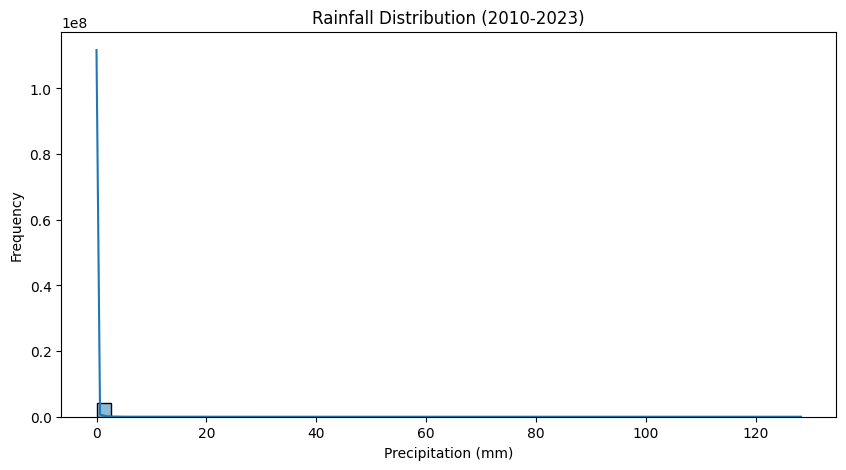

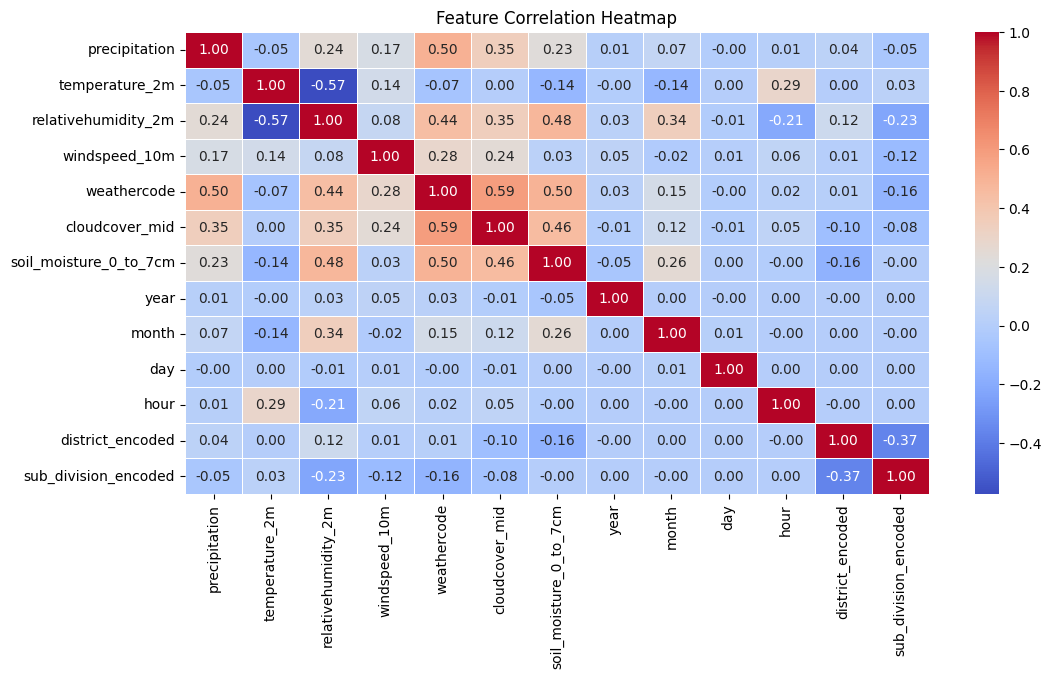

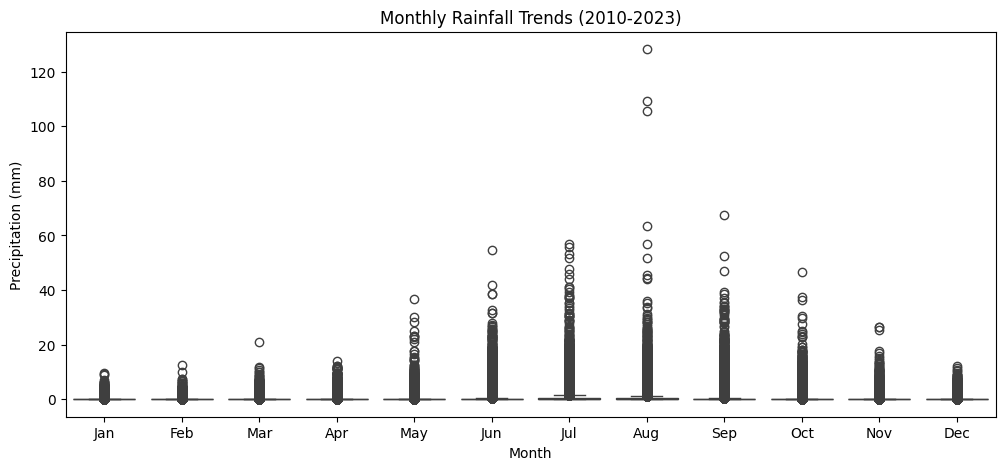

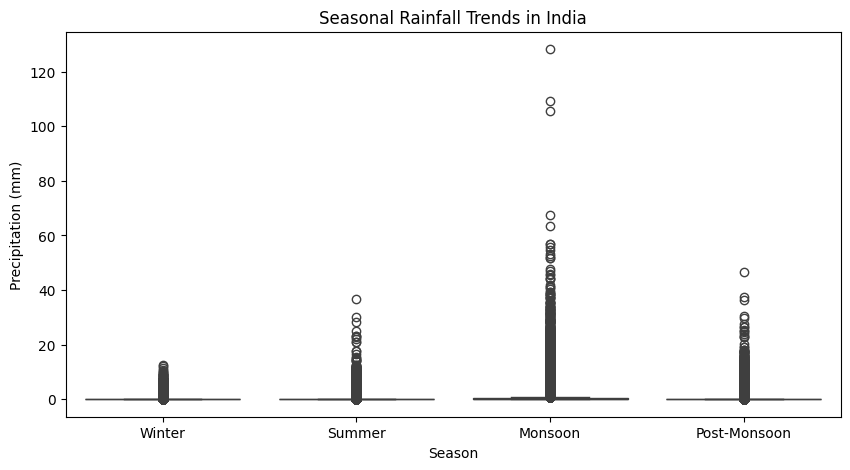

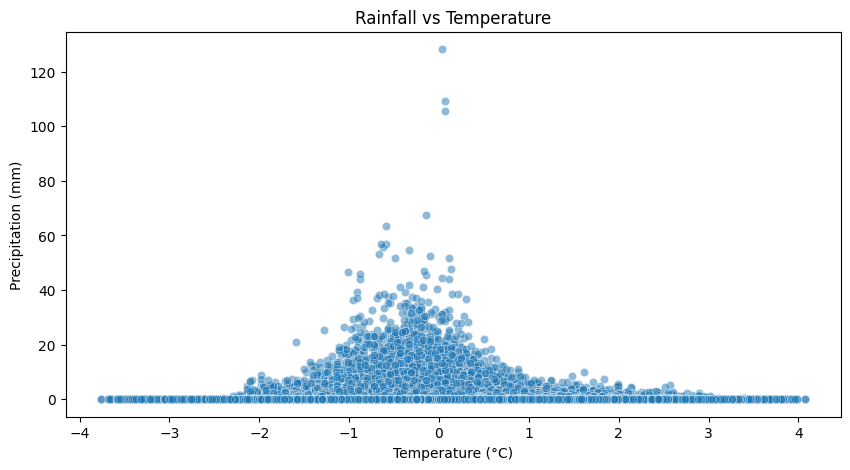


✅ EDA Completed with Indian Seasons! Insights Generated.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Preprocessed Data
df = pd.read_csv("preprocessed_weather_data.csv")

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Summary Statistics
print("\nData Summary:\n", df.describe())

# Rainfall Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['precipitation'], bins=50, kde=True)
plt.title("Rainfall Distribution (2010-2023)")
plt.xlabel("Precipitation (mm)")
plt.ylabel("Frequency")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Monthly Rainfall Trends
plt.figure(figsize=(12,5))
sns.boxplot(x=df['month'], y=df['precipitation'])
plt.title("Monthly Rainfall Trends (2010-2023)")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.xticks(ticks=range(12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

# ✅ Define Indian Seasons
df['season'] = df['month'].map({
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Summer', 4: 'Summer', 5: 'Summer',
    6: 'Monsoon', 7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon',
    10: 'Post-Monsoon', 11: 'Post-Monsoon'
})

# Seasonal Rainfall Analysis
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['season'], y=df['precipitation'], order=['Winter', 'Summer', 'Monsoon', 'Post-Monsoon'])
plt.title("Seasonal Rainfall Trends in India")
plt.xlabel("Season")
plt.ylabel("Precipitation (mm)")
plt.show()

# Rainfall vs Temperature
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['temperature_2m'], y=df['precipitation'], alpha=0.5)
plt.title("Rainfall vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm)")
plt.show()

print("\n✅ EDA Completed with Indian Seasons! Insights Generated.")


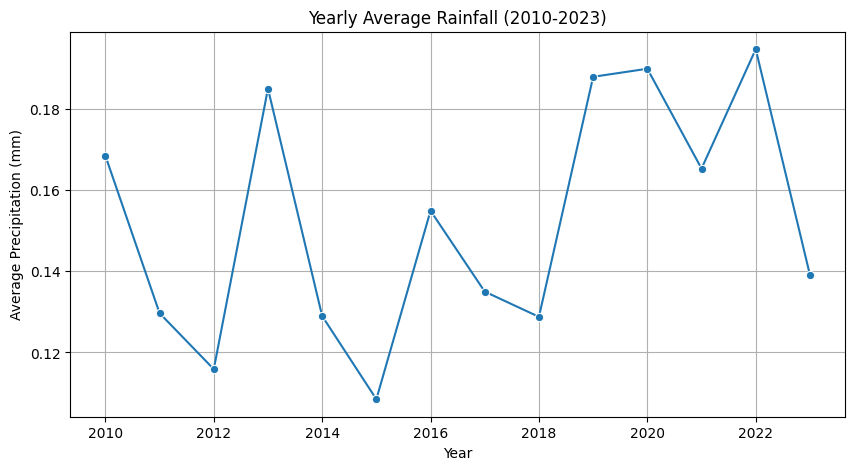

In [ ]:
# Group by year and calculate average precipitation
yearly_rainfall = df.groupby("year")["precipitation"].mean()

# Plot yearly rainfall trend
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_rainfall.index, y=yearly_rainfall.values, marker="o")
plt.title("Yearly Average Rainfall (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Average Precipitation (mm)")
plt.grid()
plt.show()


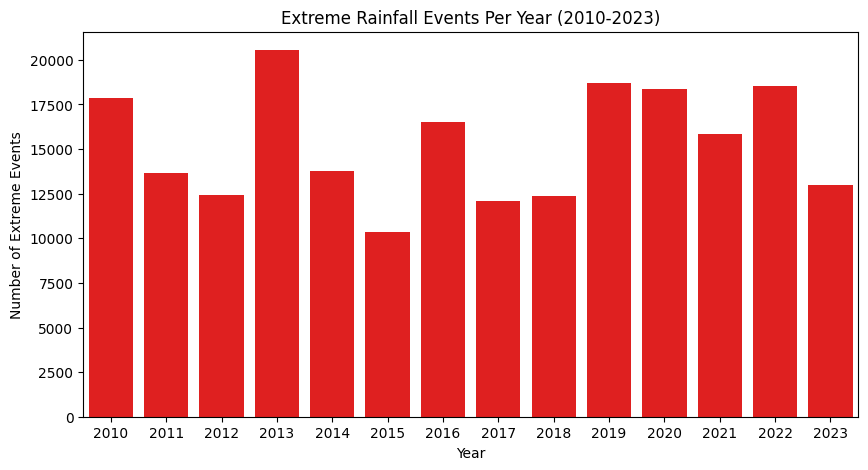

In [ ]:
# Define threshold for extreme rainfall (e.g., 95th percentile)
extreme_threshold = df["precipitation"].quantile(0.95)

# Count extreme rainfall events per year
extreme_events = df[df["precipitation"] > extreme_threshold].groupby("year").size()

# Plot extreme rainfall events
plt.figure(figsize=(10, 5))
sns.barplot(x=extreme_events.index, y=extreme_events.values, color="red")
plt.title("Extreme Rainfall Events Per Year (2010-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Extreme Events")
plt.show()


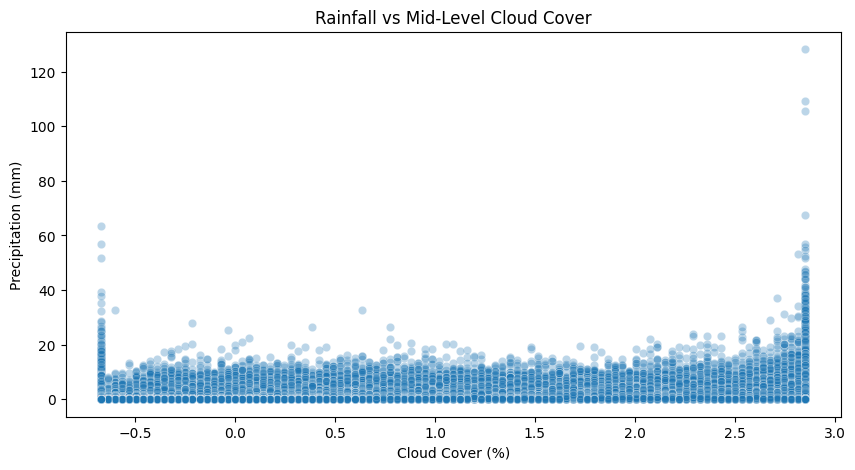

Correlation between Cloud Cover & Rainfall: 0.35


In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["cloudcover_mid"], y=df["precipitation"], alpha=0.3)
plt.title("Rainfall vs Mid-Level Cloud Cover")
plt.xlabel("Cloud Cover (%)")
plt.ylabel("Precipitation (mm)")
plt.show()

# Correlation Value
corr_cloud_rain = df["cloudcover_mid"].corr(df["precipitation"])
print(f"Correlation between Cloud Cover & Rainfall: {corr_cloud_rain:.2f}")


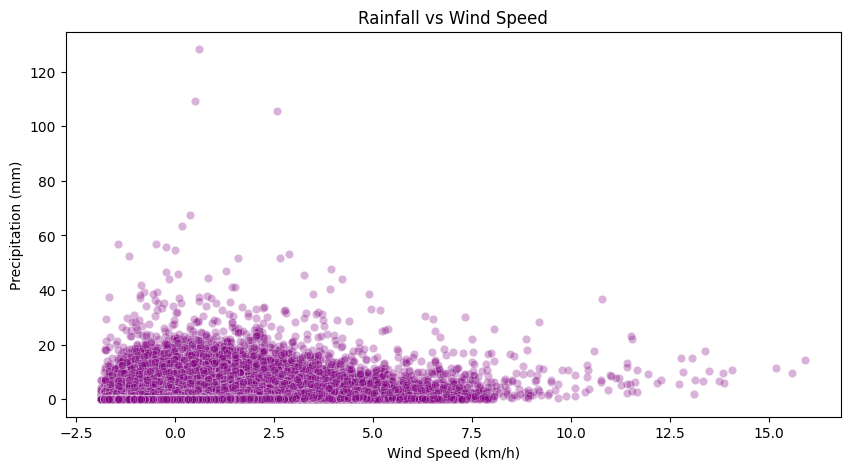

Correlation between Wind Speed & Rainfall: 0.17


In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["windspeed_10m"], y=df["precipitation"], alpha=0.3, color="purple")
plt.title("Rainfall vs Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Precipitation (mm)")
plt.show()

# Correlation Value
corr_wind_rain = df["windspeed_10m"].corr(df["precipitation"])
print(f"Correlation between Wind Speed & Rainfall: {corr_wind_rain:.2f}")


In [ ]:
# Check available column names
print("Available columns:", df.columns)

Available columns: Index(['precipitation', 'temperature_2m', 'relativehumidity_2m',
       'windspeed_10m', 'weathercode', 'cloudcover_mid',
       'soil_moisture_0_to_7cm', 'year', 'month', 'day', 'hour',
       'district_encoded', 'sub_division_encoded', 'season'],
      dtype='object')


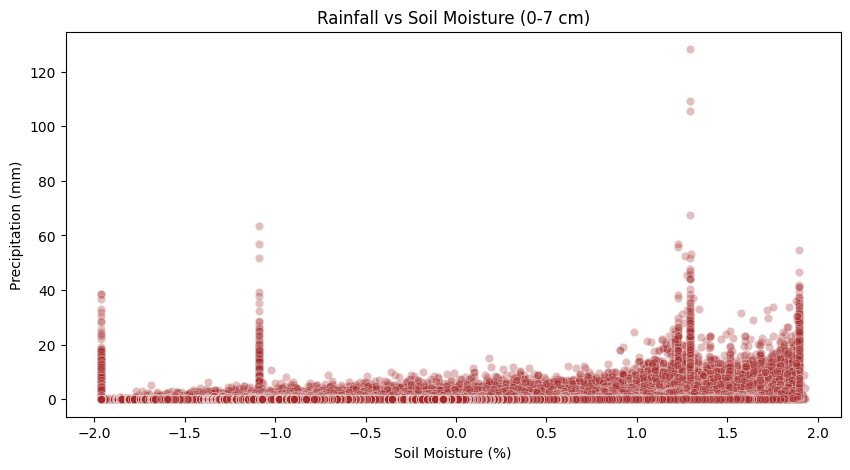

Correlation between Soil Moisture & Rainfall: 0.23


In [ ]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["soil_moisture_0_to_7cm"], y=df["precipitation"], alpha=0.3, color="brown")
plt.title("Rainfall vs Soil Moisture (0-7 cm)")
plt.xlabel("Soil Moisture (%)")
plt.ylabel("Precipitation (mm)")
plt.show()

# Correlation Value
corr_soil_rain = df["soil_moisture_0_to_7cm"].corr(df["precipitation"])
print(f"Correlation between Soil Moisture & Rainfall: {corr_soil_rain:.2f}")


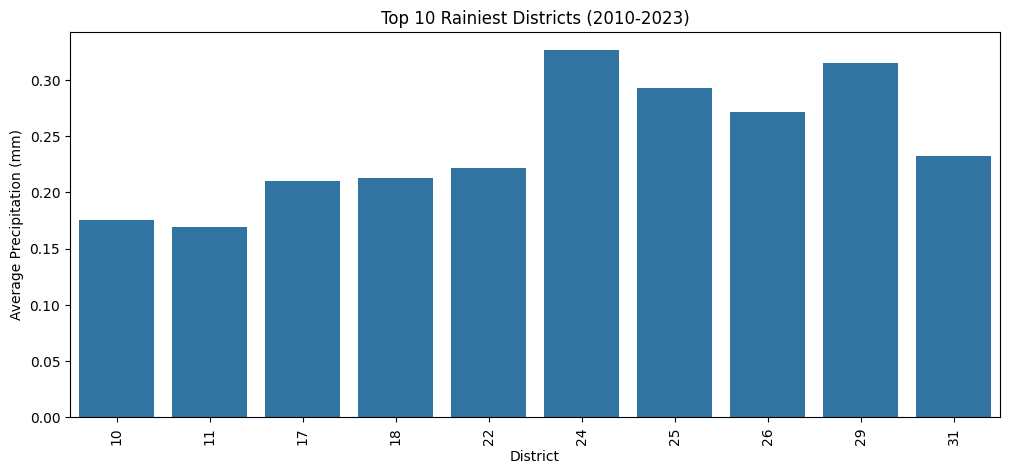

In [ ]:
# Compute mean precipitation per district
district_rainfall = df.groupby("district_encoded")["precipitation"].mean().sort_values(ascending=False)

# Plot top 10 districts with highest rainfall
plt.figure(figsize=(12, 5))
sns.barplot(x=district_rainfall.index[:10], y=district_rainfall.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Rainiest Districts (2010-2023)")
plt.xlabel("District")
plt.ylabel("Average Precipitation (mm)")
plt.show()


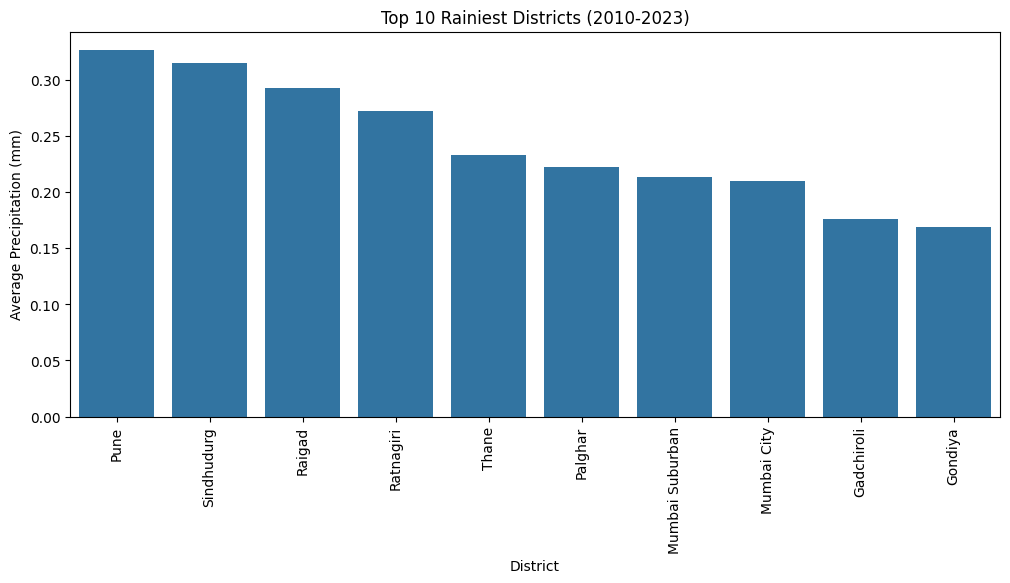

In [ ]:
# Compute mean precipitation per district
df1 = pd.read_csv("/content/drive/MyDrive/Industry_Project/records.csv")
district_rainfall = df1.groupby("district")["precipitation"].mean().sort_values(ascending=False)

# Plot top 10 districts with highest rainfall
plt.figure(figsize=(12, 5))
sns.barplot(x=district_rainfall.index[:10], y=district_rainfall.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Rainiest Districts (2010-2023)")
plt.xlabel("District")
plt.ylabel("Average Precipitation (mm)")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load Preprocessed Data
df = pd.read_csv("preprocessed_weather_data.csv")

# Features & Target
X = df.drop(columns=["precipitation"])  # Features
y = df["precipitation"]  # Target Variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### ✅ Model 1: XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.01, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train)
xgb_preds = xgb_model.predict(X_test_scaled)

### ✅ Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)

### ✅ Model 3: LSTM Neural Network
X_train_lstm = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_lstm = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

lstm_model = Sequential([
    LSTM(100, return_sequences=True, input_shape=(X_train_scaled.shape[1], 1)),
    Dropout(0.2),
    LSTM(50),
    Dense(25, activation="relu"),
    Dense(1)
])

lstm_model.compile(optimizer="adam", loss="mse")
lstm_model.fit(X_train_lstm, y_train, epochs=20, batch_size=64, validation_data=(X_test_lstm, y_test))

lstm_preds = lstm_model.predict(X_test_lstm).flatten()

# ✅ Evaluate Models
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔹 {name} Performance:")
    print(f"   ✅ MAE: {mae:.2f}")
    print(f"   ✅ RMSE: {rmse:.2f}")
    print(f"   ✅ R² Score: {r2:.4f}")
    print("-" * 40)

evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("LSTM", y_test, lstm_preds)

# Save Models
import joblib
joblib.dump(xgb_model, "xgb_rainfall.pkl")
joblib.dump(rf_model, "rf_rainfall.pkl")
joblib.dump(scaler, "scaler.pkl")
lstm_model.save("lstm_rainfall.h5")

print("✅ Models trained and saved successfully!")


KeyboardInterrupt: 

In [ ]:
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"🔹 {name} Performance:")
    print(f"   ✅ MAE: {mae:.2f}")
    print(f"   ✅ RMSE: {rmse:.2f}")
    print(f"   ✅ R² Score: {r2:.4f}")
    print("-" * 40)

evaluate_model("XGBoost", y_test, xgb_preds)
evaluate_model("Random Forest", y_test, rf_preds)

In [ ]:
import joblib
joblib.dump(xgb_model, "xgb_rainfall.pkl")
joblib.dump(rf_model, "rf_rainfall.pkl")

In [ ]:
joblib.dump(scaler, "scaler.pkl")

In [6]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb
import catboost as cb

# Load Preprocessed Data
df = pd.read_csv("preprocessed_weather_data.csv")

# Define Features and Target
X = df.drop(columns=["precipitation"])
y = df["precipitation"]

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LightGBM Regressor
lgb_model = lgb.LGBMRegressor(n_estimators=1000, learning_rate=0.05, max_depth=10, random_state=42)
lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)

# CatBoost Regressor
cat_model = cb.CatBoostRegressor(n_estimators=1000, learning_rate=0.05, depth=10, verbose=200, random_state=42)
cat_model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose=200)
cat_preds = cat_model.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n📊 {model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.4f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")

evaluate_model(y_test, lgb_preds, "LightGBM Regressor")
evaluate_model(y_test, cat_preds, "CatBoost Regressor")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.107057 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 3435936, number of used features: 12
[LightGBM] [Info] Start training from score 0.152320
0:	learn: 0.6584432	test: 0.6480736	best: 0.6480736 (0)	total: 1.51s	remaining: 25m 4s
200:	learn: 0.2470496	test: 0.2475919	best: 0.2475919 (200)	total: 3m 14s	remaining: 12m 51s
400:	learn: 0.2301577	test: 0.2423913	best: 0.2423810 (399)	total: 6m 25s	remaining: 9m 36s
600:	learn: 0.2194412	test: 0.2392853	best: 0.2392853 (600)	total: 9m 39s	remaining: 6m 24s
800:	learn: 0.2114085	test: 0.2375453	best: 0.2375154 (793)	total: 12m 55s	remaining: 3m 12s
999:	learn: 0.2050494	test: 0.2362656	best: 0.2362656 (999)	total: 16m 8s	remaining: 0us

bestTest = 0.2362655931
bestIteration = 999



In [8]:
import joblib

# Save LightGBM model
joblib.dump(lgb_model, "Light_gbm_rainfall.pkl")

# Save CatBoost model
joblib.dump(cat_model, "Cat_boost_rainfall.pkl")

print("✅ Models saved successfully!")

✅ Models saved successfully!
